In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("credit+approval/crx.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [21]:
columns = [f"A{i}" for i in range(1, len(df.columns) + 1)]  # робимо імена колонокзгідно датасету
df.columns = columns
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [22]:
df.isna().sum() # >> показує крізь 0, але ми прочитали, в описі що пропуски є. Подивисось що мможе бути пропуском


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [23]:
df.value_counts()  # бачимо сивол "?", якого не має бути в ознаках, судячи з опису

A1  A2     A3      A4  A5  A6  A7  A8      A9  A10  A11  A12  A13  A14    A15   A16
b   ?      10.500  u   g   x   v   6.500   t   f    0    f    g    00000  0     +      1
?   20.08  0.125   u   g   q   v   1.000   f   t    1    f    g    00240  768   +      1
b   64.08  20.000  u   g   x   h   17.500  t   t    9    t    g    00000  1000  +      1
    63.33  0.540   u   g   c   v   0.585   t   t    3    t    g    00180  0     -      1
    62.75  7.000   u   g   e   z   0.000   f   f    0    f    g    00000  12    -      1
                                                                                      ..
?   29.75  0.665   u   g   w   v   0.250   f   f    0    t    g    00300  0     -      1
    29.50  2.000   y   p   e   h   2.000   f   f    0    f    g    00256  17    -      1
    28.17  0.585   u   g   aa  v   0.040   f   f    0    f    g    00260  1004  -      1
    26.50  2.710   y   p   ?   ?   0.085   f   f    0    f    s    00080  0     -      1
    24.50  12.750  u   g  

In [24]:
(df == "?").sum() # так, судячи з опису, це наші пропуски. 


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [26]:
# так як ми не знаємо як класифікувати категоріальні ознаки з пропущєними значеннями - ми їх видалимо
# можемо собі це дозволити так як таких значень небагато
df.replace("?", np.nan, inplace=True)

for col in df.columns: # спочатку приведемо все що можемо до числових типів та змінимо самі типи
    if np.issubdtype(df[col].dtype, np.integer):
        df[col] = df[col].astype("int32")
        continue
    try:
        df[col] = df[col].astype("float32")
    except ValueError as ex:
        # print(f"{col}: {ex}")
        continue
# df.info()

obj_cols = df.select_dtypes(include="object")
indxs = obj_cols[obj_cols.isna().any(axis=1)].index  # отримали індекси усіх рядків в колонках типу object которих були пропущені значення
# indxs
df.drop(indxs, inplace=True)
df.isna().sum()

A1      0
A2     12
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     7
A15     0
A16     0
dtype: int64

In [27]:
# тепер всім пропускам дамо середнє значення по колонці
numeric_df = df.select_dtypes(exclude="object")
df[numeric_df.columns] = numeric_df.apply(lambda x: x.fillna(x.mean()), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      671 non-null    object 
 1   A2      671 non-null    float32
 2   A3      671 non-null    float32
 3   A4      671 non-null    object 
 4   A5      671 non-null    object 
 5   A6      671 non-null    object 
 6   A7      671 non-null    object 
 7   A8      671 non-null    float32
 8   A9      671 non-null    object 
 9   A10     671 non-null    object 
 10  A11     671 non-null    int32  
 11  A12     671 non-null    object 
 12  A13     671 non-null    object 
 13  A14     671 non-null    float32
 14  A15     671 non-null    int32  
 15  A16     671 non-null    object 
dtypes: float32(4), int32(2), object(10)
memory usage: 73.4+ KB


In [ ]:
df_orig = df.copy() #скопіюємо собі датафрейм щоб якщо що в будь-який момент повернутись до нього

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.080000,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.670000,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.250000,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.920000,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [30]:
# переведемо категорійні ознаки в числові. Для ознак які мають 2 унікальних значення переведемо в 1 та 0
# для ознак, що мають три колонки застосуємо OneHotEncoder, більше трьох BinaryEncoder. TargetEncoder ми не використаємо так як він може дуже сильно корелювати з таргетом
from category_encoders import BinaryEncoder, OneHotEncoder
val_list = []
for col in df.select_dtypes(include="object").columns: 
    val_list = df[col].unique()
    # print(val_list)e
    if len(val_list) == 2:
        df[col] = df[col].map({val_list[0]: 1, val_list[1]: 0})
    else:
        if len(val_list) == 3:
            encoder = OneHotEncoder(cols=[col], use_cat_names=True)
        else:
            encoder = BinaryEncoder(cols=[col])
        encoded_col = encoder.fit_transform(df[col])
        df.drop(columns=[col], inplace=True)
        df = pd.concat([df, encoded_col], axis=1)

# для зручності повернемо таргет на останню позицію
target = df.pop("A16")
df["A16"] = target
df

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A6_2,A6_3,A7_0,A7_1,A7_2,A7_3,A13_g,A13_s,A13_p,A16
0,1,30.830000,0.000,1.25,1,1,1,1,202.0,0,...,0,1,0,0,0,1,1,0,0,1
1,0,58.669998,4.460,3.04,1,1,6,1,43.0,560,...,1,0,0,0,1,0,1,0,0,1
2,0,24.500000,0.500,1.50,1,0,0,1,280.0,824,...,1,0,0,0,1,0,1,0,0,1
3,1,27.830000,1.540,3.75,1,1,5,0,100.0,3,...,0,1,0,0,0,1,1,0,0,1
4,1,20.170000,5.625,1.71,1,0,0,1,120.0,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.080000,10.085,1.25,0,0,0,1,260.0,0,...,1,1,0,0,1,0,1,0,0,0
686,0,22.670000,0.750,2.00,0,1,2,0,200.0,394,...,1,1,0,0,0,1,1,0,0,0
687,0,25.250000,13.500,2.00,0,1,1,0,200.0,1,...,0,1,0,1,0,0,1,0,0,0
688,1,17.920000,0.205,0.04,0,0,0,1,280.0,750,...,0,0,0,0,0,1,1,0,0,0


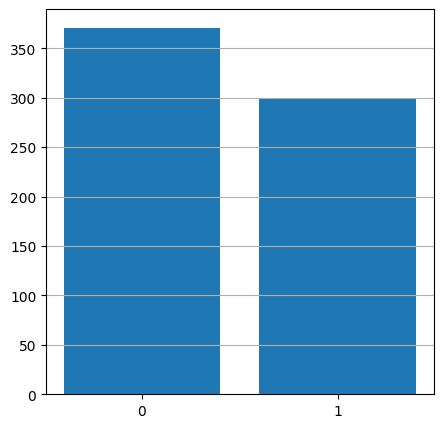

In [ ]:
# спочатку спробуємо декілька моделей, подивимось з якою наші перспективи виглядають привабливішими, після цього займемось дослідженням даних
# але хочаб подивимось на розподіл таргетів в датасеті, хоча в доках до нього пишуть, що все ок
target_count = df["A16"].value_counts()

plt.figure(figsize=(5, 5))
plt.bar(target_count.index, target_count.values)
plt.xticks(target_count.index)
plt.grid(axis='y')

# будемо вважати що таргети у нас в нормальній кількості. Якщо дасть Бог та Укренерго пододаємо та повидаляємо дані для балансування класів


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler # так як ми будемо працювати з метричною моделлю - це більш привабливий вибір
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
trgt = "A16"
#швиденько зробимо крос-валідацію
scaller = MinMaxScaler()

df_features, df_targets = df.drop(columns=trgt), df[trgt]
features = scaller.fit_transform(df_features)

X_train, X_test, y_train, y_test = train_test_split(features, df_targets, random_state=42, shuffle=True, stratify=df_targets)

X_train_with_const, X_test_with_const = sm.add_constant(X_train), sm.add_constant(X_test)

In [67]:
log_model = LogisticRegression(random_state=42)

cv_scores = cross_val_score(log_model, X_train, y_train, cv=5) # 
cv_scores
# бачимо досить стабільний розподіл даних. можна працювати

array([0.84158416, 0.91089109, 0.84158416, 0.82      , 0.85      ])

In [94]:
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score

def plot_results(p, y):
    plt.figure(figsize=(15, 5))
    # намалювати графік де p = результати роботи моделі (лінія), y - вірні відповіді (точки)
    plt.scatter(range(len(y)), y, color="red", label="y_test")
    plt.scatter(range(len(p)), p, color="green", label="predicted", marker="x")
    # plt.plot(range(len(p)), p, color="red", label="predicted", linestyle="-", )

    plt.xlabel('кількість')
    plt.ylabel('Значення')
    plt.legend()
    plt.grid(True)

def print_scores(p, y):
    print("r2:",r2_score(p, y))
    print("accuracy: ", accuracy_score(p, y))
    print("precision: ", precision_score(p, y))
    print("recall: ", recall_score(p, y))
    print("f1: ", f1_score(p, y))


r2: 0.47611622962437994
accuracy:  0.8690476190476191
precision:  0.92
recall:  0.8117647058823529
f1:  0.8625


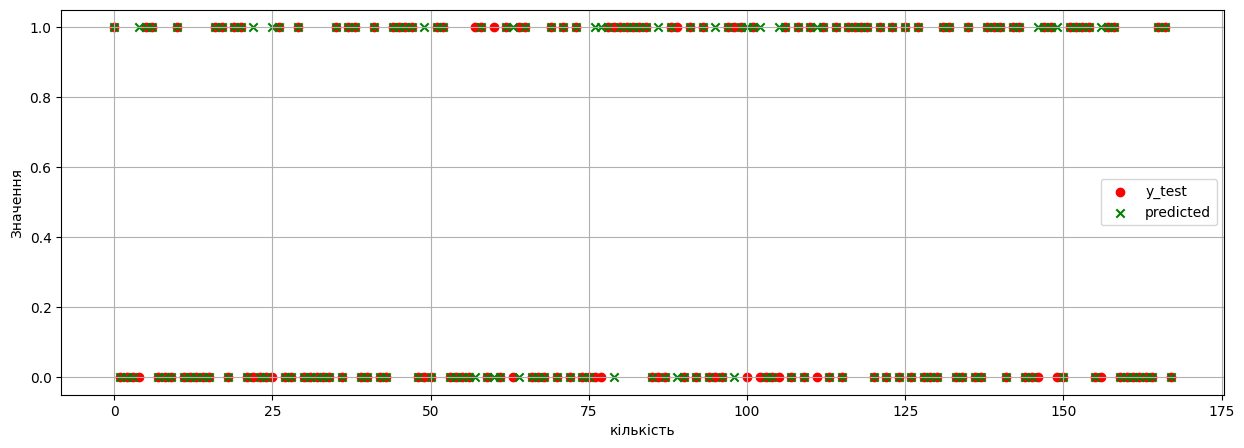

In [ ]:
log_model.fit(X_train_with_const, y_train)

log_res = log_model.predict(X_test_with_const)
plot_results(log_res, y_test)
print_scores(log_res, y_test)

# вгадали 87% по валідаційній виборці. Маємо гарний prcision - 92% - тобто модель у 92 відсотках випадків знаходить вірне рішення для таргета (значення 1)
# recall 81% - модель з усіх своїх передбачень вірно класифікувала 81% 
# r2 у нашому випадку не є авторитетним показником так як фактично ми виконуємо задачу класифікації, його можна було б видалити

r2: 0.3217015140591204
accuracy:  0.8333333333333334
precision:  0.8
recall:  0.821917808219178
f1:  0.8108108108108109


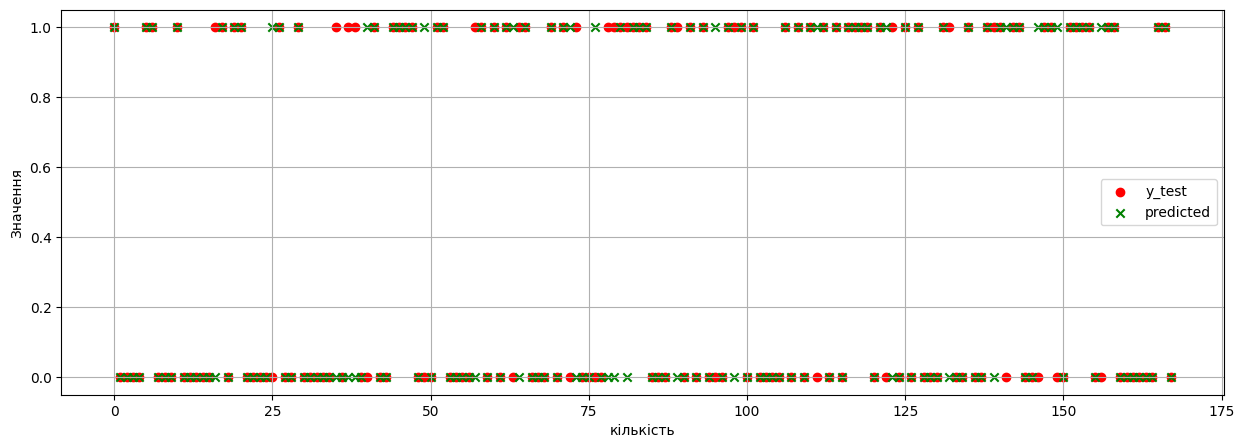

In [ ]:
# подивимось що нам скаже метод найближчого сусіда

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)  # нам непотрібна константа

knn_res = knn_model.predict(X_test)

plot_results(knn_res, y_test)
print_scores(knn_res, y_test)

# бачимо дещо нижчу точність, але! Дещо нижчий precision та майже такий самий recal кажуть нам про те що модель правильно знаходить стільки ж, але 
# з усіх справжніх позитивних відповідей модель знайшла менше вірних. Тобто якщо ціна похибки велика - ця модель не є кращім варіантом, якщо ми готові ризикувати - то ця модель виглядає привабливіше
# якщо б ми обрали цю модель - варто було б сконцентруватись на підвищенні f1 score 

r2: 0.21939886743139225
accuracy:  0.8095238095238095
precision:  0.76
recall:  0.8028169014084507
f1:  0.7808219178082192


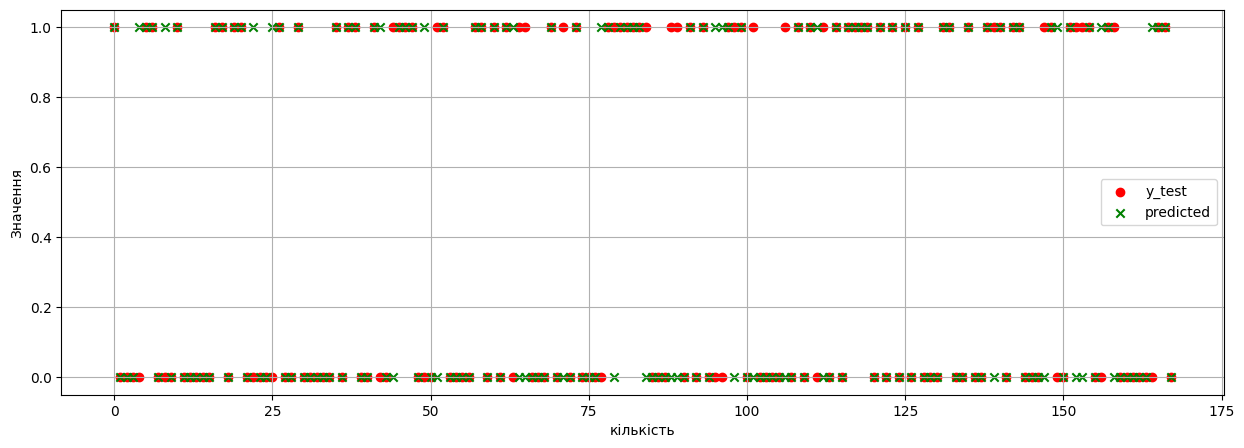

In [102]:
tree_model = tree.DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_res = tree_model.predict(X_test)
plot_results(tree_res, y_test)
print_scores(tree_res, y_test)



[Text(0.43041666666666667, 0.9615384615384616, 'x[4] <= 0.5\ngini = 0.49\nsamples = 503\nvalue = [278, 225]\nclass = 1'),
 Text(0.18166666666666667, 0.8846153846153846, 'x[2] <= 0.01\ngini = 0.13\nsamples = 235\nvalue = [218, 17]\nclass = 1'),
 Text(0.30604166666666666, 0.9230769230769231, 'True  '),
 Text(0.05333333333333334, 0.8076923076923077, 'x[19] <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = 1'),
 Text(0.02666666666666667, 0.7307692307692307, 'x[20] <= 0.5\ngini = 0.24\nsamples = 7\nvalue = [6, 1]\nclass = 1'),
 Text(0.013333333333333334, 0.6538461538461539, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 1'),
 Text(0.04, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 0'),
 Text(0.08, 0.7307692307692307, 'x[24] <= 0.5\ngini = 0.41\nsamples = 7\nvalue = [2, 5]\nclass = 0'),
 Text(0.06666666666666667, 0.6538461538461539, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 0'),
 Text(0.09333333333333334, 0.6538461538461539, 'x[7] <= 0.5\ngini = 0

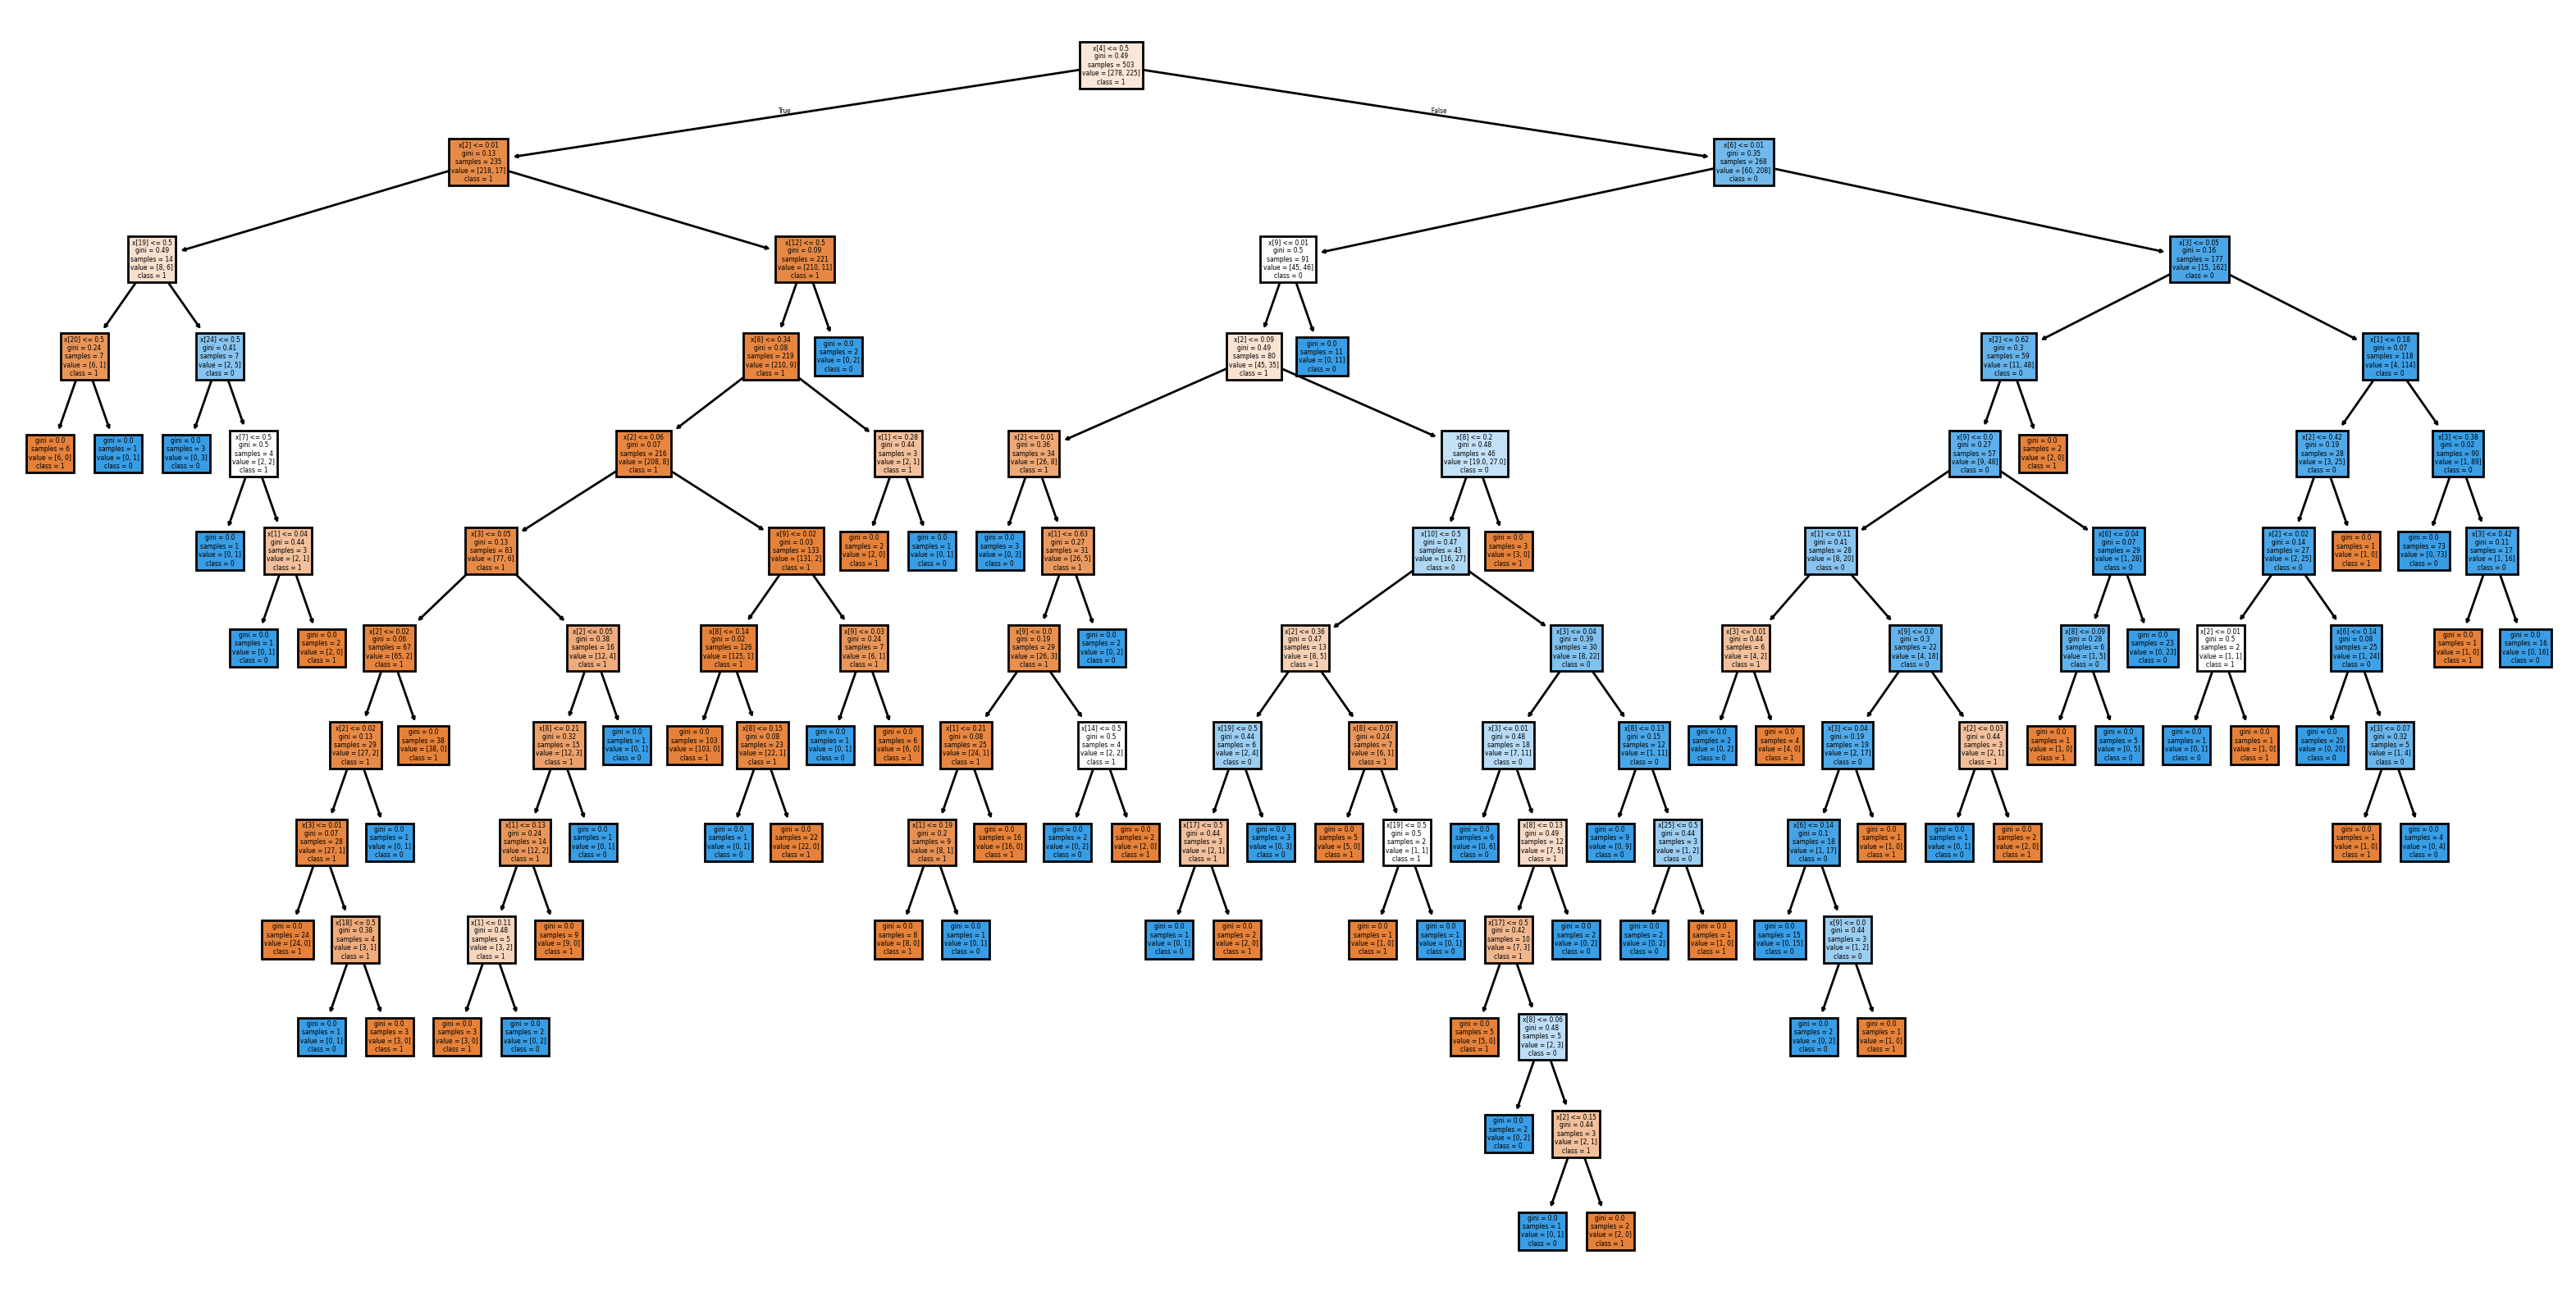

In [110]:
plt.figure(figsize=(20, 10), dpi=200)
tree.plot_tree(tree_model,filled=True, precision=2, class_names=["1", "0"])

In [ ]:
# бачимо, що DecisionTreeClassifier воправся із задачею трохи гірше ніж метод найближчих сусідів, якщо ми говоримо про стандартні параметри. 


r2: 0.48388364779874227
accuracy:  0.8712871287128713
precision:  0.8888888888888888
recall:  0.8333333333333334
f1:  0.8602150537634409


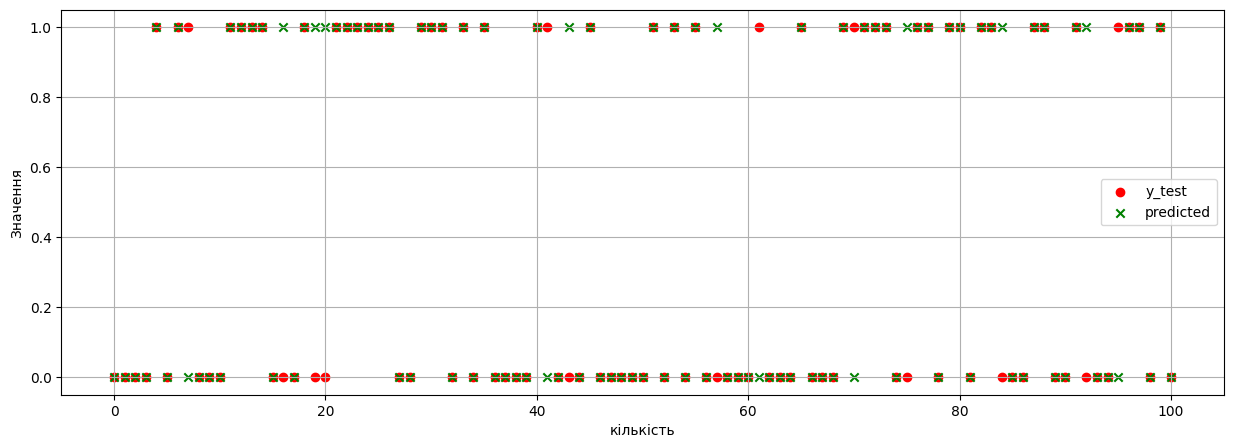

In [115]:
# спробуємо щє без нормалізації даних, так як для дерева рішень це не критично
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(df_features, df_targets, test_size=.15, shuffle=True, stratify=df_targets)

tree_model.fit(X_train_orig, y_train_orig)
tree_res = tree_model.predict(X_test_orig)
plot_results(tree_res, y_test_orig)
print_scores(tree_res, y_test_orig)


[Text(0.4309630102040816, 0.9583333333333334, 'x[4] <= 0.5\ngini = 0.49\nsamples = 570\nvalue = [315.0, 255.0]\nclass = 1'),
 Text(0.16581632653061223, 0.875, 'x[15] <= 0.5\ngini = 0.12\nsamples = 269\nvalue = [252, 17]\nclass = 1'),
 Text(0.2983896683673469, 0.9166666666666667, 'True  '),
 Text(0.1556122448979592, 0.7916666666666666, 'x[2] <= 0.17\ngini = 0.11\nsamples = 267\nvalue = [252, 15]\nclass = 1'),
 Text(0.07142857142857142, 0.7083333333333334, 'x[8] <= 480.0\ngini = 0.35\nsamples = 22\nvalue = [17, 5]\nclass = 1'),
 Text(0.061224489795918366, 0.625, 'x[20] <= 0.5\ngini = 0.26\nsamples = 20\nvalue = [17, 3]\nclass = 1'),
 Text(0.05102040816326531, 0.5416666666666666, 'x[3] <= 1.25\ngini = 0.19\nsamples = 19\nvalue = [17, 2]\nclass = 1'),
 Text(0.030612244897959183, 0.4583333333333333, 'x[1] <= 16.21\ngini = 0.11\nsamples = 17\nvalue = [16, 1]\nclass = 1'),
 Text(0.02040816326530612, 0.375, 'x[8] <= 160.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 1'),
 Text(0.010204081

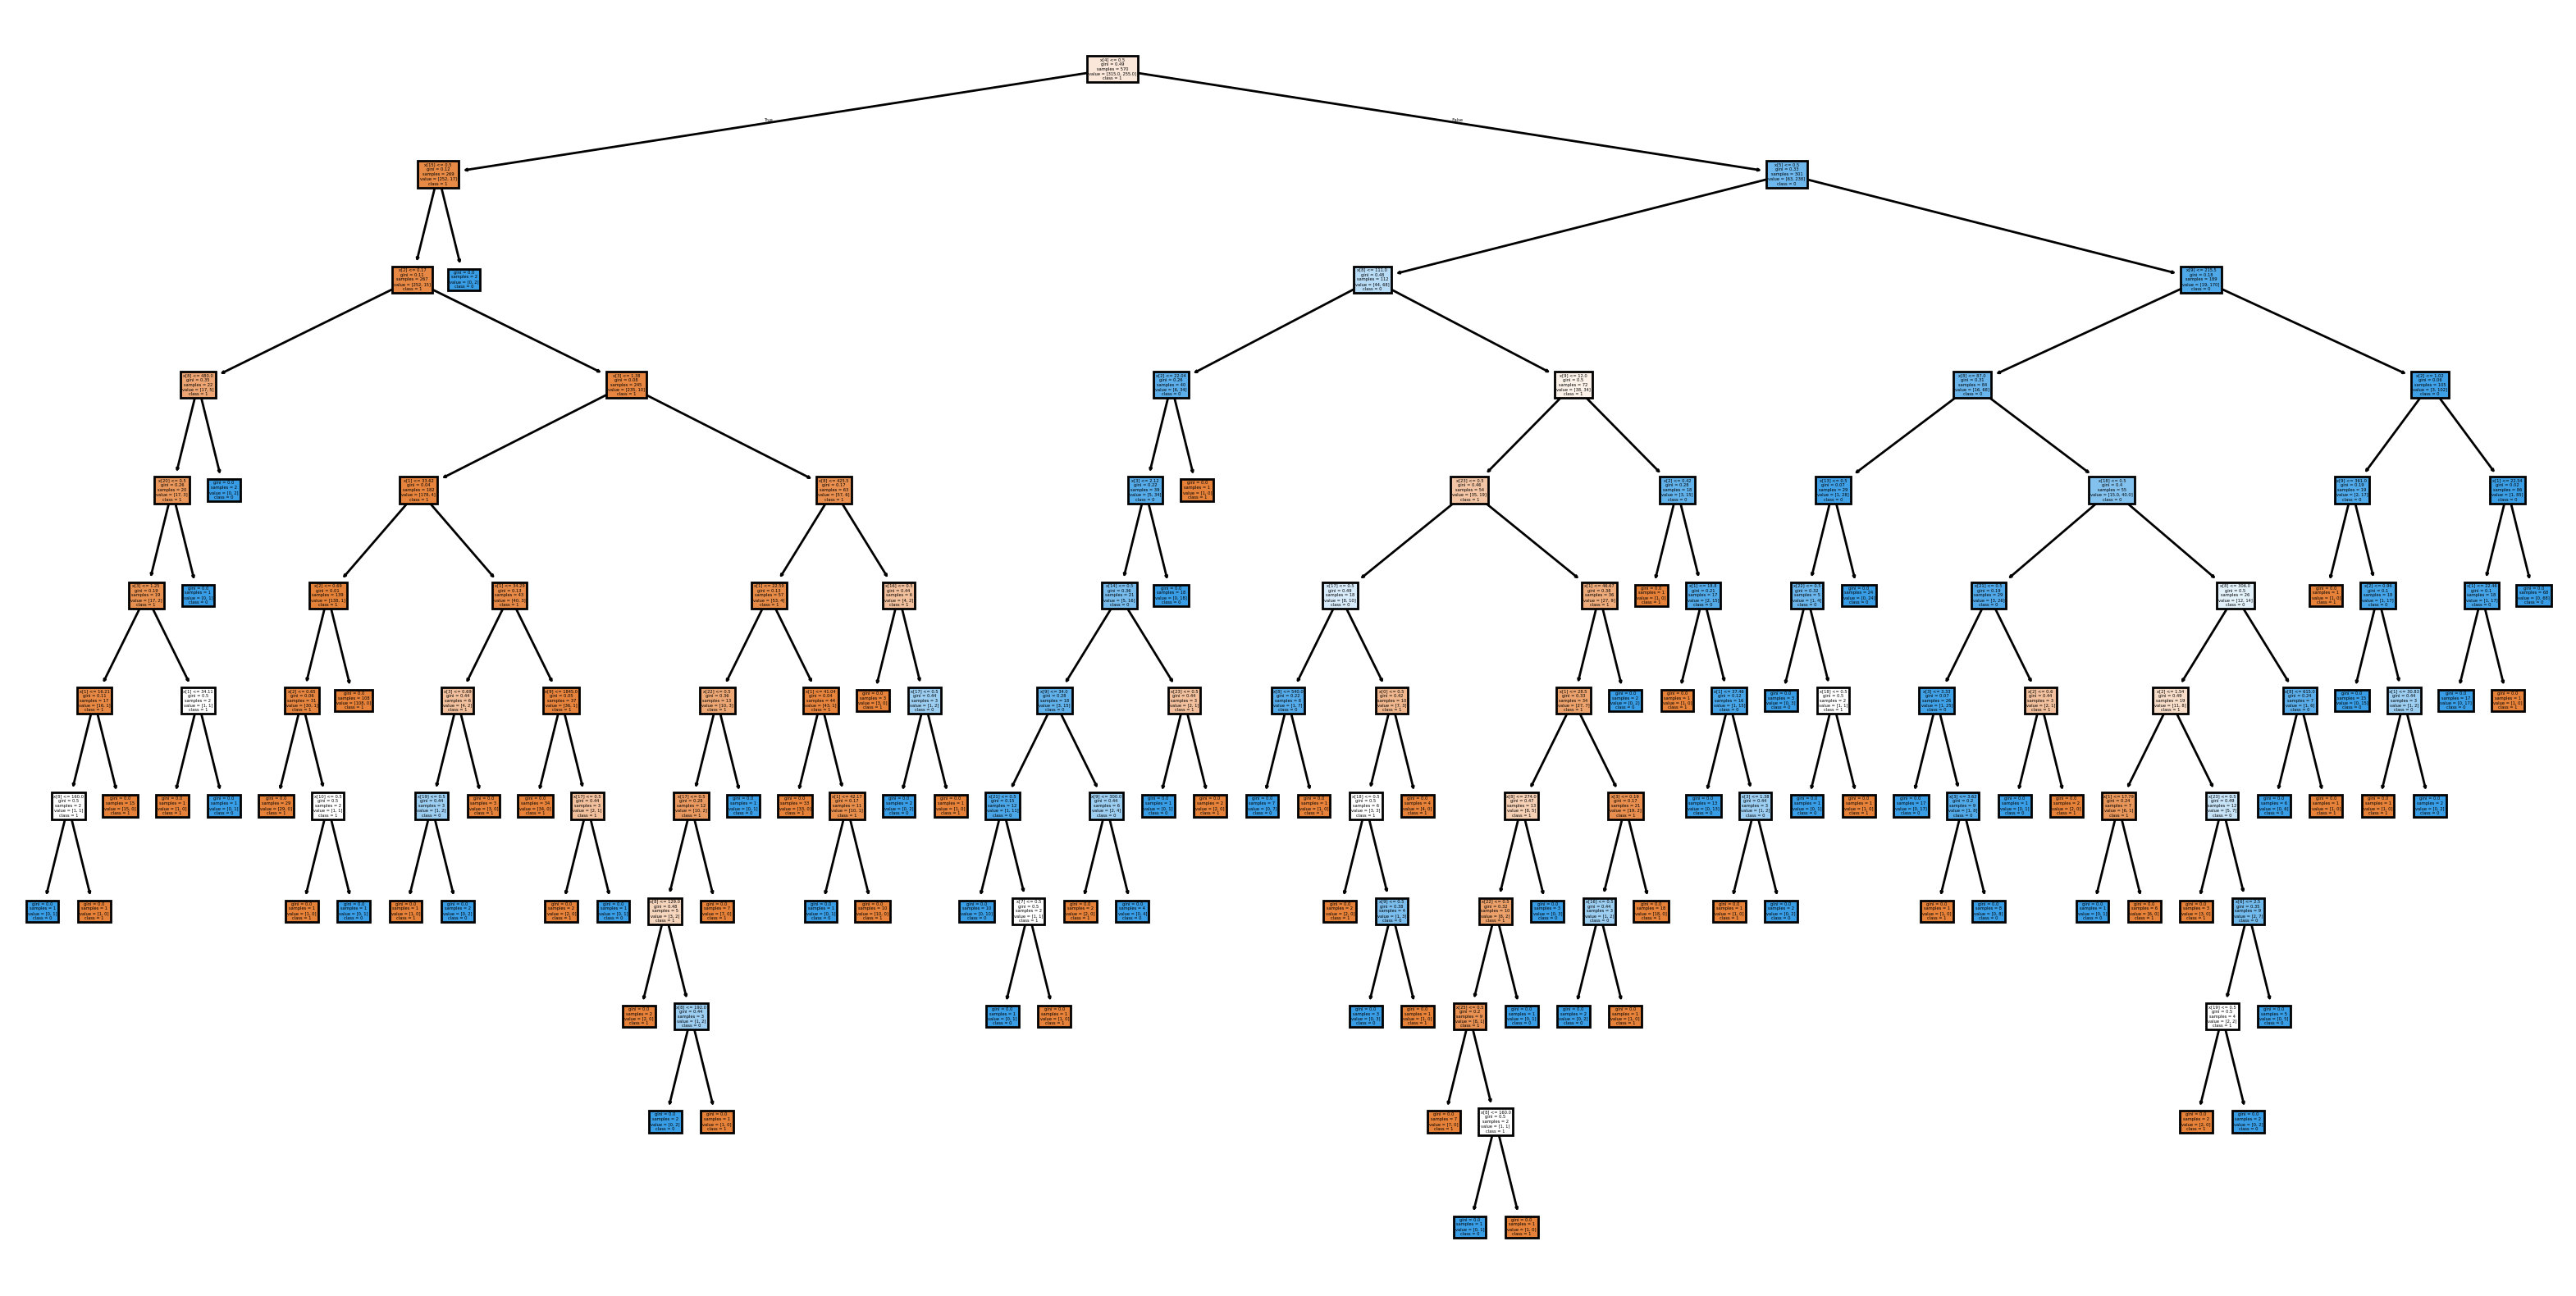

In [116]:
plt.figure(figsize=(20, 10), dpi=200)
tree.plot_tree(tree_model,filled=True, precision=2, class_names=["1", "0"])

логістична регресія:
accuracy:  0.8690476190476191
precision:  0.92
recall:  0.8117647058823529
f1:  0.8625

метричний класіфікатор 
accuracy:  0.8333333333333334
precision:  0.8
recall:  0.821917808219178
f1:  0.8108108108108109

дерево рішень (scaled)
accuracy:  0.8095238095238095
precision:  0.76
recall:  0.8028169014084507
f1:  0.7808219178082192

дерево рішень (unscaled)
accuracy:  0.8712871287128713
precision:  0.8888888888888888
recall:  0.8333333333333334
f1:  0.8602150537634409

перше що потрібно зазначити - для дерева рішень явно кращє працювати з ненормалізованими даними
Логістична регресія залишається самою точною з точки зору знаходження найбільшого відсотку вірних відповідей серед усіх передбачених вірних відповідей

In [ ]:
# цікаво яких результатів ми зможемо досягти якщо дослідимо детальніше дані та попрацюємо з гіперпараметрами. 

<Axes: >

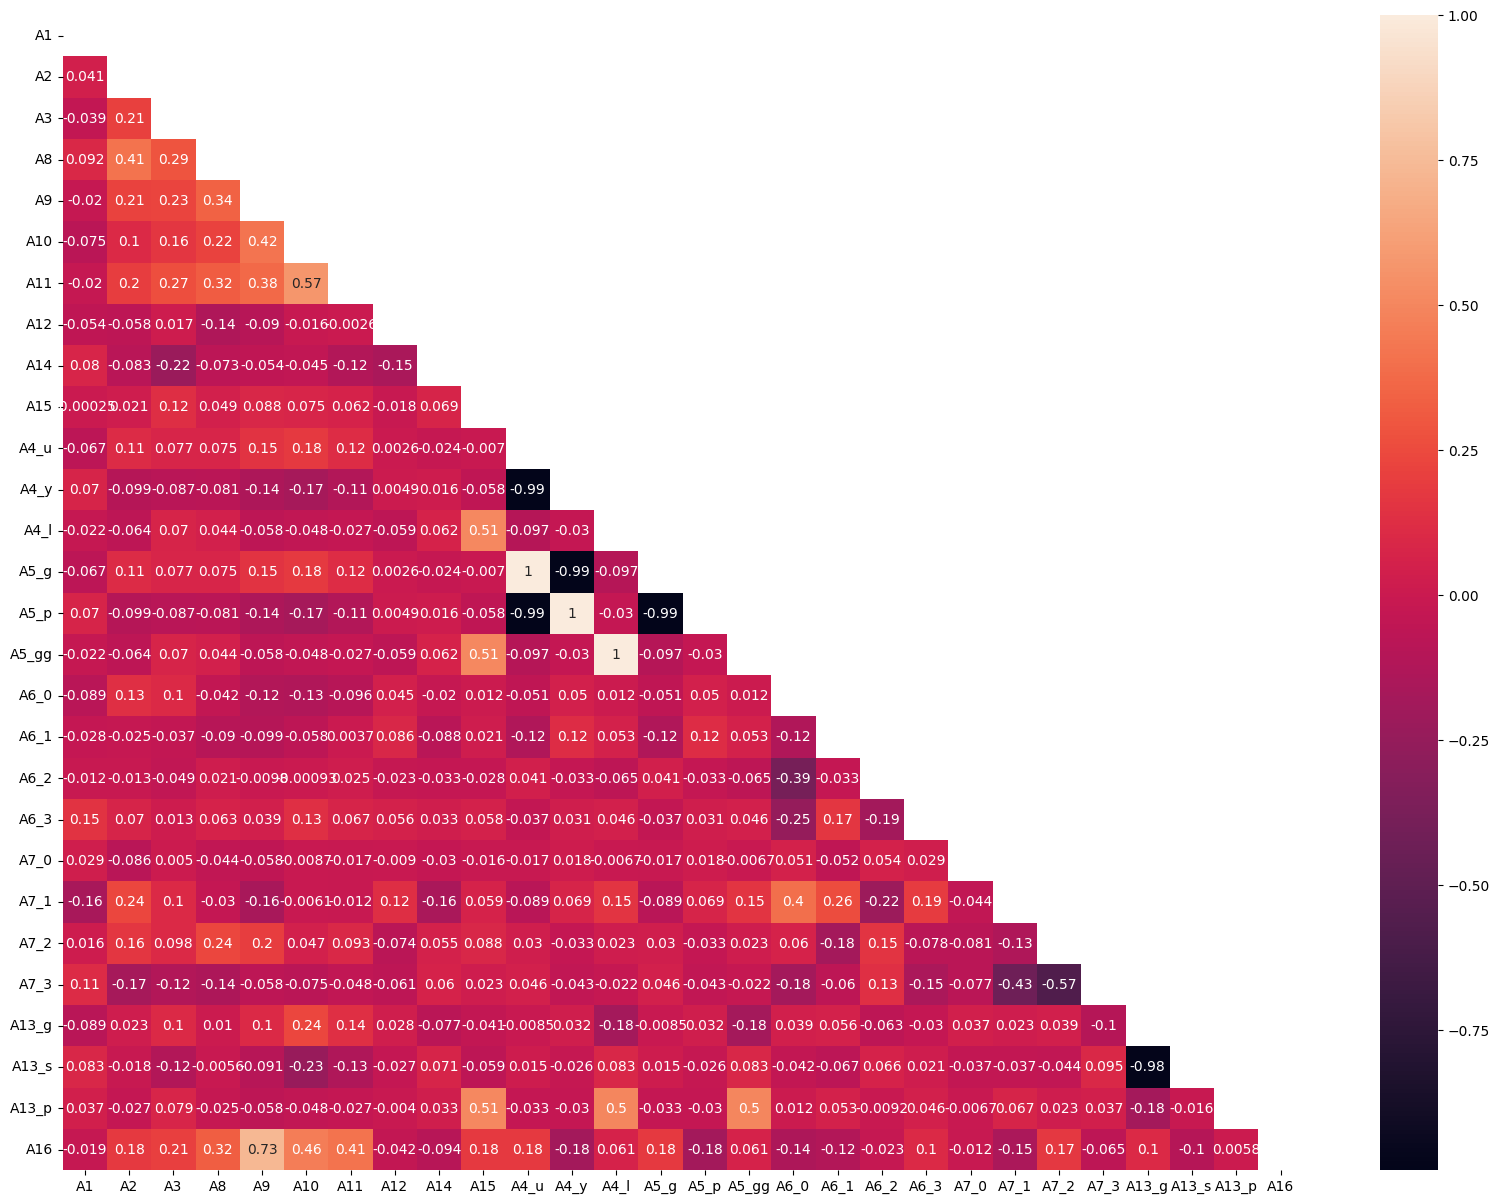

In [112]:
import seaborn as sns
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True)

In [ ]:
# бачимо що деякі фічі досить сильно корелюють між собою, і деякі мають дуже сильну від'ємну кореляцію. Це нормально - так як ми застосовували енкодери як то OneHotEncoder
# при цьому ми бачумо досить слабку кореляцію з таргетом - це пояснює кращі результати логістичної регресії перед метричною моделью та деревом рішень,
# так як висока кореляція з таргетом - це друг двох крайнії, та ворог першої